# Projet de théorie des graphes - ENSEEIHT - Ragot Cyrian

# Introduction



### Importer les données :

In [2]:
import csv
import numpy as np
from scipy.spatial.distance import cdist

# path to topologies data files
path = "./topologies/"

# import topologies and compute distances between satellites in arrays
with open(path + 'topology_low.csv', mode ='r') as file:
    Pos_low = np.array(list(csv.reader(file))[1::][1::], dtype=np.float32) # get positions in array
    Dist_low = cdist(Pos_low, Pos_low, 'euclidean') # compute euclidian distances
with open(path + 'topology_avg.csv', mode ='r') as file:
    Pos_avg = np.array(list(csv.reader(file))[1::][1::], dtype=np.float32)
    Dist_avg = cdist(Pos_avg, Pos_avg, 'euclidean')      
with open(path + 'topology_high.csv', mode ='r') as file:
    Pos_high = np.array(list(csv.reader(file))[1::][1::], dtype=np.float32)
    Dist_high = cdist(Pos_high, Pos_high, 'euclidean')


# Partie 1 : modélisation sous forme de graphe
Représentation graphique de l'essaim de satellites dans les trois configurations de densité (avg, avg, high) et les trois niveaux de portée (20km, 40km, 60km)

Choix graphes simples non orienté : la communication entre deux satellites se fait dans les deux sens si ils sont suffisamment proches et un seul satellite n'a pas besoin d'envoyer des données à lui même.

Pour un soucis de visibilité des graphes, les distances entre les sommets sont proportionnelles aux distances réelles entre les satellites. Les positions des satellites ne sont donc représentées correctement mais leurs distances entre eux le sont.

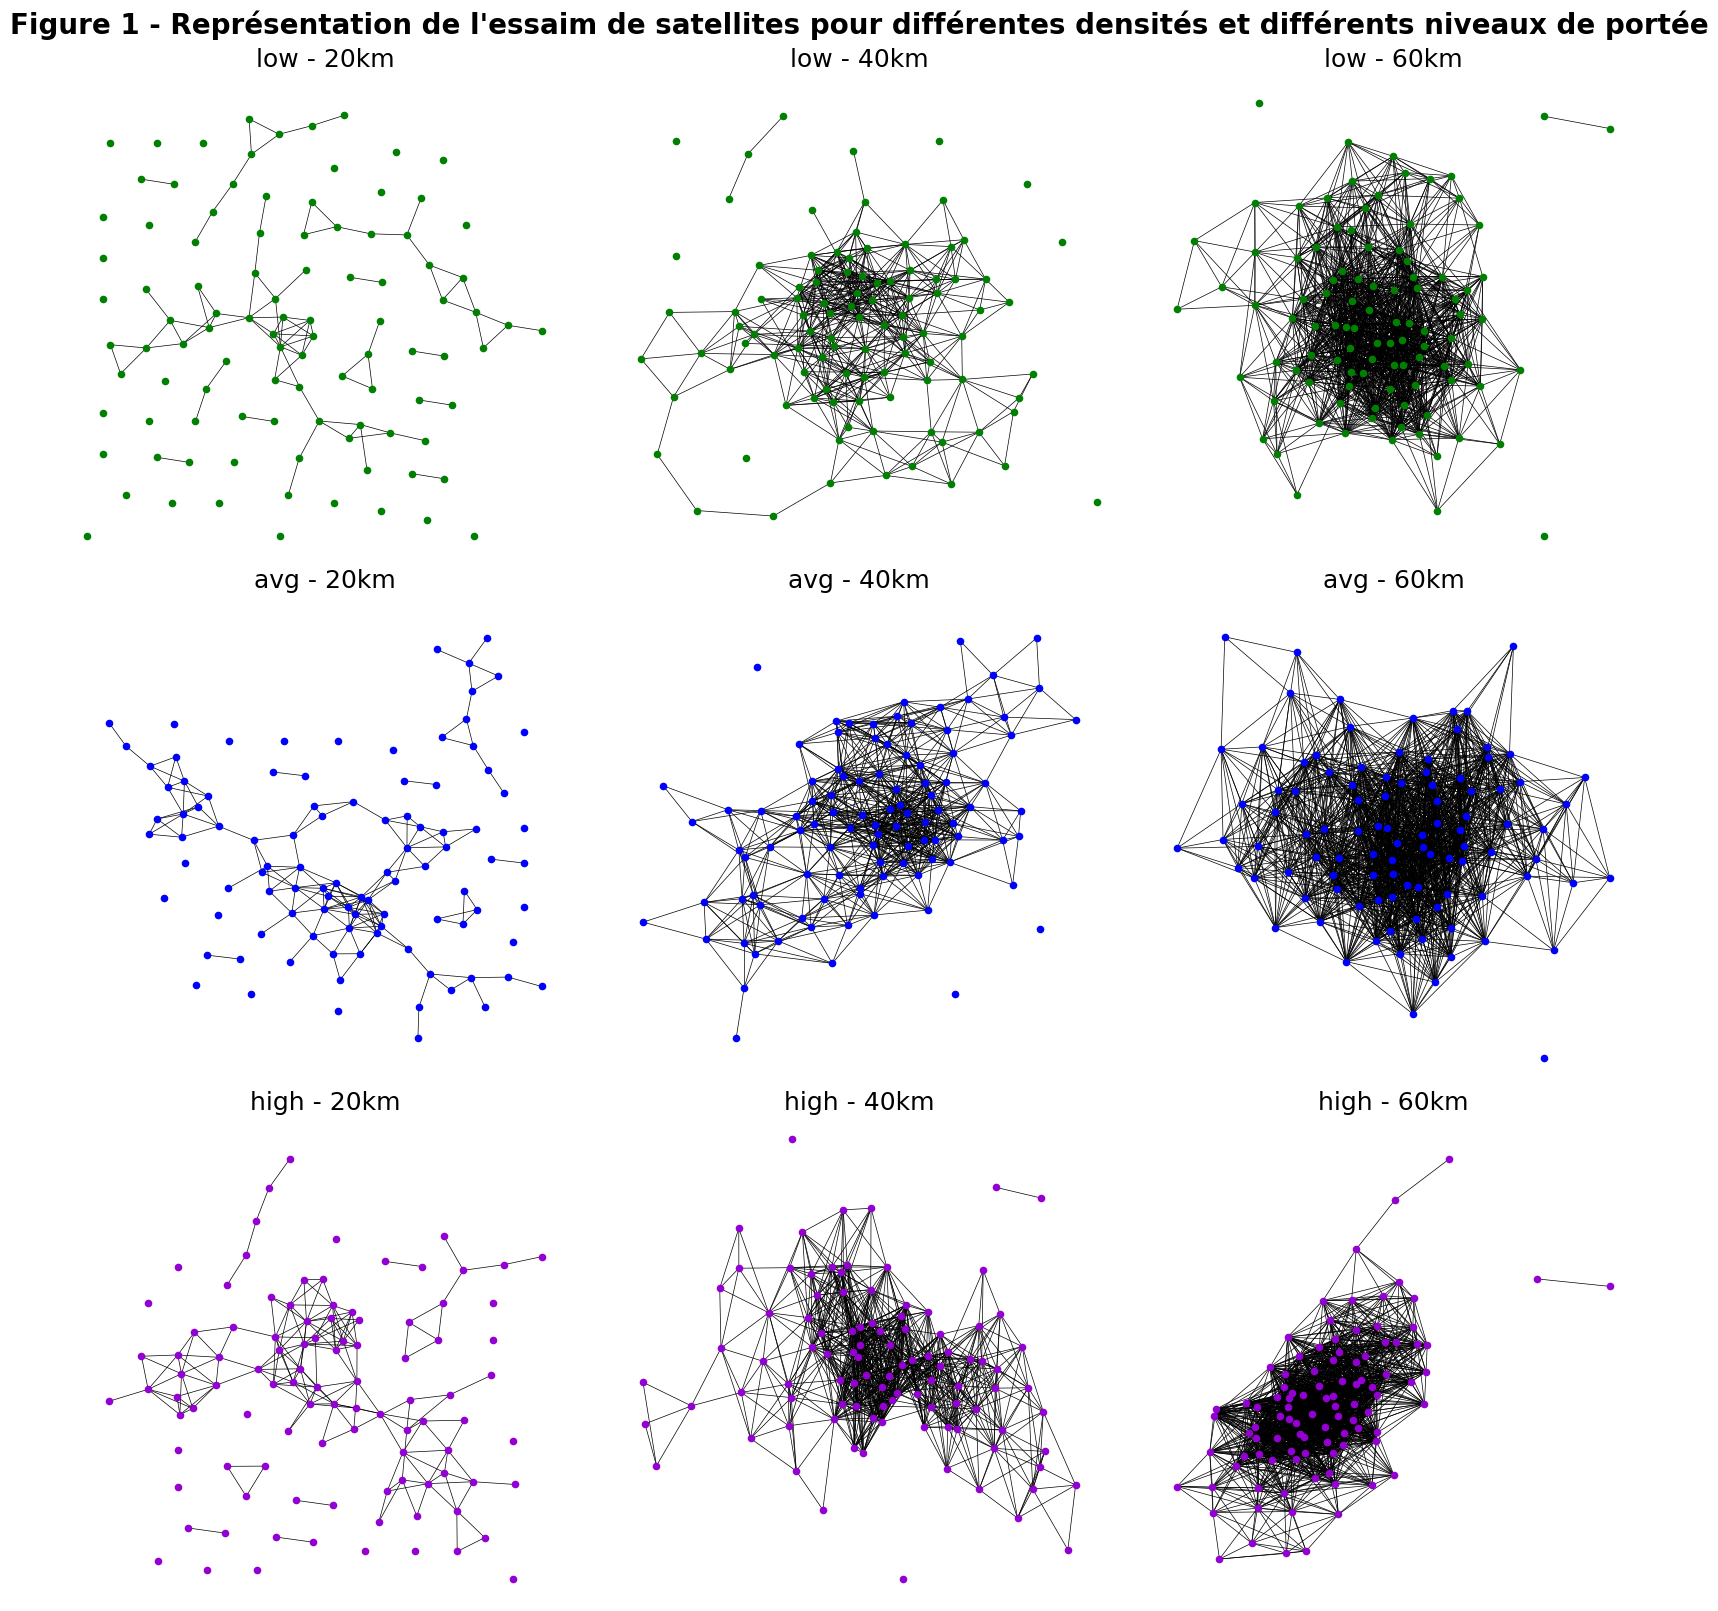

In [ ]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# compute adjacency matrixes with weight
# low
A_low_20 = np.where(Dist_low < 20000, np.multiply(Dist_low,Dist_low), 0)
A_low_40 = np.where(Dist_low < 40000, np.multiply(Dist_low,Dist_low), 0)
A_low_60 = np.where(Dist_low < 60000, np.multiply(Dist_low,Dist_low), 0)
# avg
A_avg_20 = np.where(Dist_avg < 20000, np.multiply(Dist_avg,Dist_avg), 0)
A_avg_40 = np.where(Dist_avg < 40000, np.multiply(Dist_avg,Dist_avg), 0)
A_avg_60 = np.where(Dist_avg < 60000, np.multiply(Dist_avg,Dist_avg), 0)
# high
A_high_20 = np.where(Dist_high < 20000, np.multiply(Dist_high,Dist_high), 0)
A_high_40 = np.where(Dist_high < 40000, np.multiply(Dist_high,Dist_high), 0)
A_high_60 = np.where(Dist_high < 60000, np.multiply(Dist_high,Dist_high), 0)


# compute graphs
# low
G_low_20 = nx.from_numpy_array(A_low_20, create_using=nx.Graph, parallel_edges=False)
G_low_20.remove_edges_from(nx.selfloop_edges(G_low_20)) # remove self looping (simple graphs)
G_low_40 = nx.from_numpy_array(A_low_40, create_using=nx.Graph, parallel_edges=False)
G_low_40.remove_edges_from(nx.selfloop_edges(G_low_40))
G_low_60 = nx.from_numpy_array(A_low_60, create_using=nx.Graph, parallel_edges=False)
G_low_60.remove_edges_from(nx.selfloop_edges(G_low_60))
# avg
G_avg_20 = nx.from_numpy_array(A_avg_20, create_using=nx.Graph, parallel_edges=False)
G_avg_20.remove_edges_from(nx.selfloop_edges(G_avg_20))
G_avg_40 = nx.from_numpy_array(A_avg_40, create_using=nx.Graph, parallel_edges=False)
G_avg_40.remove_edges_from(nx.selfloop_edges(G_avg_40))
G_avg_60 = nx.from_numpy_array(A_avg_60, create_using=nx.Graph, parallel_edges=False)
G_avg_60.remove_edges_from(nx.selfloop_edges(G_avg_60))
# high
G_high_20 = nx.from_numpy_array(A_high_20, create_using=nx.Graph, parallel_edges=False)
G_high_20.remove_edges_from(nx.selfloop_edges(G_high_20))
G_high_40 = nx.from_numpy_array(A_high_40, create_using=nx.Graph, parallel_edges=False)
G_high_40.remove_edges_from(nx.selfloop_edges(G_high_40))
G_high_60 = nx.from_numpy_array(A_high_60, create_using=nx.Graph, parallel_edges=False)
G_high_60.remove_edges_from(nx.selfloop_edges(G_high_60))


# graphs and plot positions dictionary used to iterate over the differents graphs easily
graphs_dict = {
    ("low","20"):(G_low_20,0,0),
    ("low","40"):(G_low_40,0,1),
    ("low","60"):(G_low_60,0,2),
    ("avg","20"):(G_avg_20,1,0),
    ("avg","40"):(G_avg_40,1,1),
    ("avg","60"):(G_avg_60,1,2),
    ("high","20"):(G_high_20,2,0),
    ("high","40"):(G_high_40,2,1),
    ("high","60"):(G_high_60,2,2)
}


# draw graphs
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 16), layout="constrained")
fig.suptitle("Figure 1 - Représentation de l'essaim de satellites pour différentes densités et différents niveaux de portée", fontsize=20, fontweight="bold")

axs[0,0].set_title("low - 20km", fontsize=18)
nx.draw(G_low_20, node_size=20, width=0.5, node_color='green', ax=axs[0,0], pos=graphviz_layout(G_low_20) )
axs[0,1].set_title("low - 40km", fontsize=18)
nx.draw(G_low_40, node_size=20, width=0.5, node_color='green', ax=axs[0,1], pos=graphviz_layout(G_low_40))
axs[0,2].set_title("low - 60km", fontsize=18)
nx.draw(G_low_60, node_size=20, width=0.5, node_color='green', ax=axs[0,2], pos=graphviz_layout(G_low_60))

axs[1,0].set_title("avg - 20km", fontsize=18)
nx.draw(G_avg_20, node_size=20, width=0.5, node_color='blue', ax=axs[1,0], pos=graphviz_layout(G_avg_20))
axs[1,1].set_title("avg - 40km", fontsize=18)
nx.draw(G_avg_40, node_size=20, width=0.5, node_color='blue', ax=axs[1,1], pos=graphviz_layout(G_avg_40))
axs[1,2].set_title("avg - 60km", fontsize=18)
nx.draw(G_avg_60, node_size=20, width=0.5, node_color='blue', ax=axs[1,2], pos=graphviz_layout(G_avg_60))

axs[2,0].set_title("high - 20km", fontsize=18)
nx.draw(G_high_20, node_size=20, width=0.5, node_color='darkviolet', ax=axs[2,0], pos=graphviz_layout(G_high_20))
axs[2,1].set_title("high - 40km", fontsize=18)
nx.draw(G_high_40, node_size=20, width=0.5, node_color='darkviolet', ax=axs[2,1], pos=graphviz_layout(G_high_40))
axs[2,2].set_title("high - 60km", fontsize=18)
nx.draw(G_high_60, node_size=20, width=0.5, node_color='darkviolet', ax=axs[2,2], pos=graphviz_layout(G_high_60))


# Partie 2 : étude des graphes non valués

## Degré moyen, distribution du degré, moyenne et distribution du degré de clustering


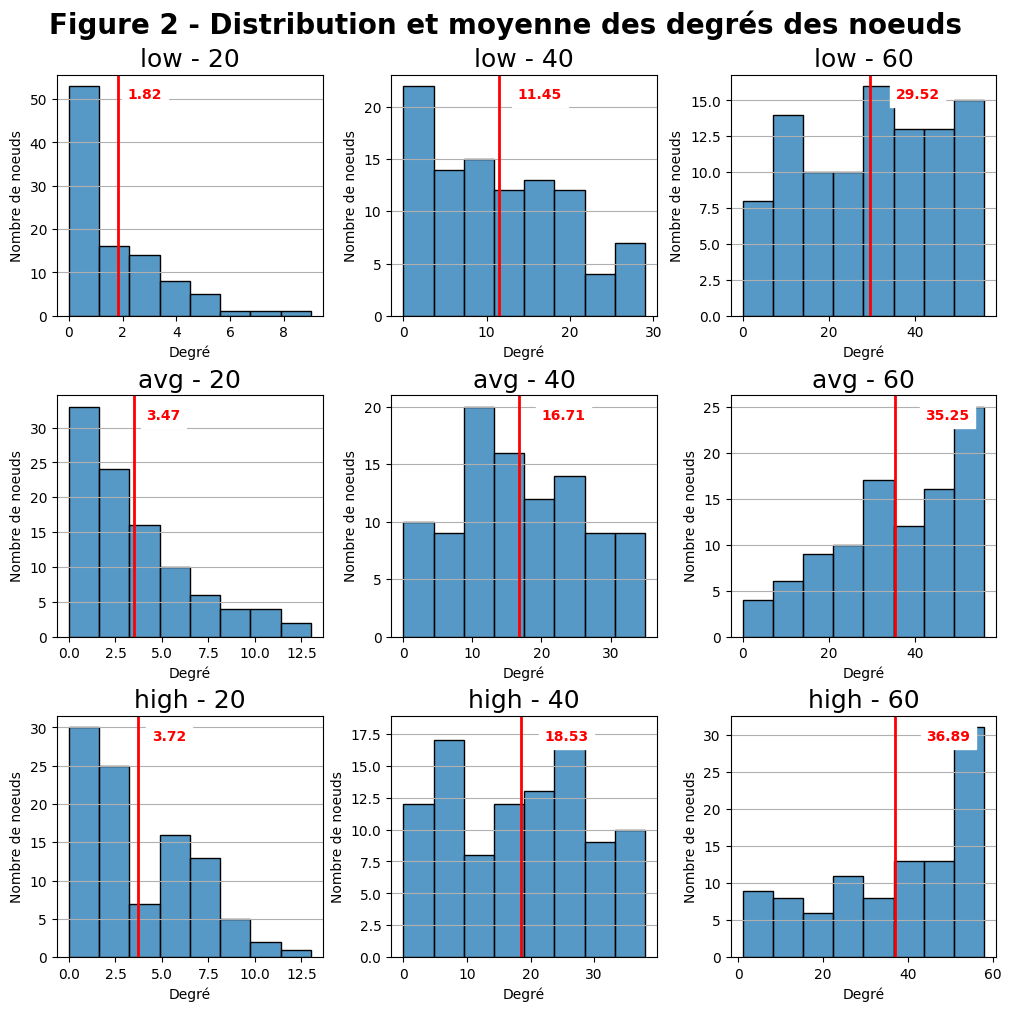

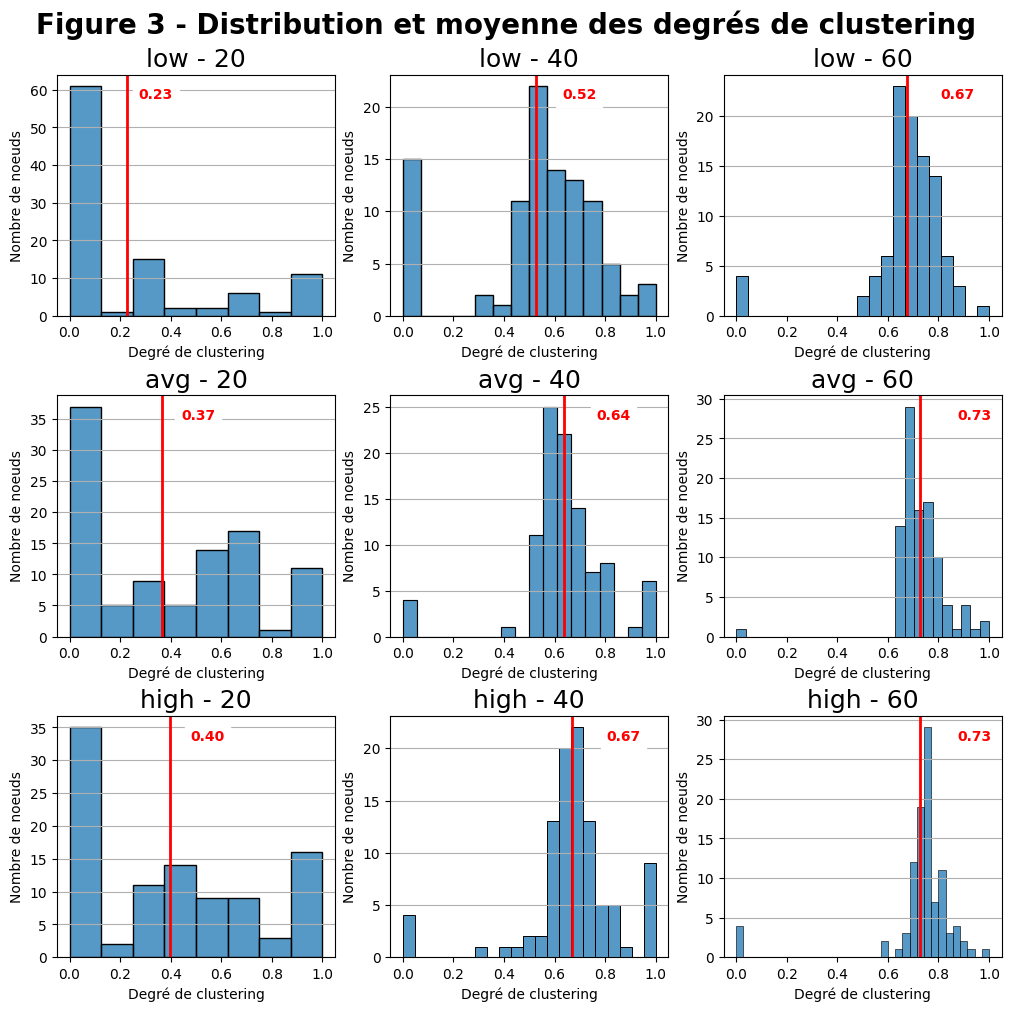

In [4]:
import networkx as nx
from scipy.stats import pmean
import seaborn as sns
import matplotlib.pyplot as plt

# compute nodes degrees mean and distribution and plot figure
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), layout="constrained")
fig.suptitle("Figure 2 - Distribution et moyenne des degrés des noeuds", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    degrees = list(map(lambda x: x[1], G.degree))
    mean = pmean(degrees, 1)
    ax = sns.histplot(degrees, stat='count', ax=axs[i,j])
    ax.set_title(density + " - " + scope, fontsize=18)
    ax.set(xlabel="Degré", ylabel="Nombre de noeuds")
    ax.axvline(mean, color='red', lw=2)
    ax.grid(axis='y')
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(mean*1.2, max_ylim*0.9, '{:.2f}'.format(mean), color='red', weight='bold', backgroundcolor="white")
plt.show()

# compute clustering coefficent mean and distribution and plot figure
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), layout="constrained")
fig.suptitle("Figure 3 - Distribution et moyenne des degrés de clustering", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    clust_coeffs = list(nx.clustering(G).values())
    mean = pmean(clust_coeffs, 1)
    ax = sns.histplot(clust_coeffs, stat='count', ax=axs[i,j])
    ax.set_title(density + " - " + scope, fontsize=18)
    ax.set(xlabel="Degré de clustering", ylabel="Nombre de noeuds")
    ax.axvline(mean, color='red', lw=2)
    ax.grid(axis='y')
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(mean*1.2, max_ylim*0.9, '{:.2f}'.format(mean), color='red', weight='bold', backgroundcolor="white")
plt.show()




## Nombre de cliques (et leurs ordres), nombre de composantes connexes (et leurs ordres)

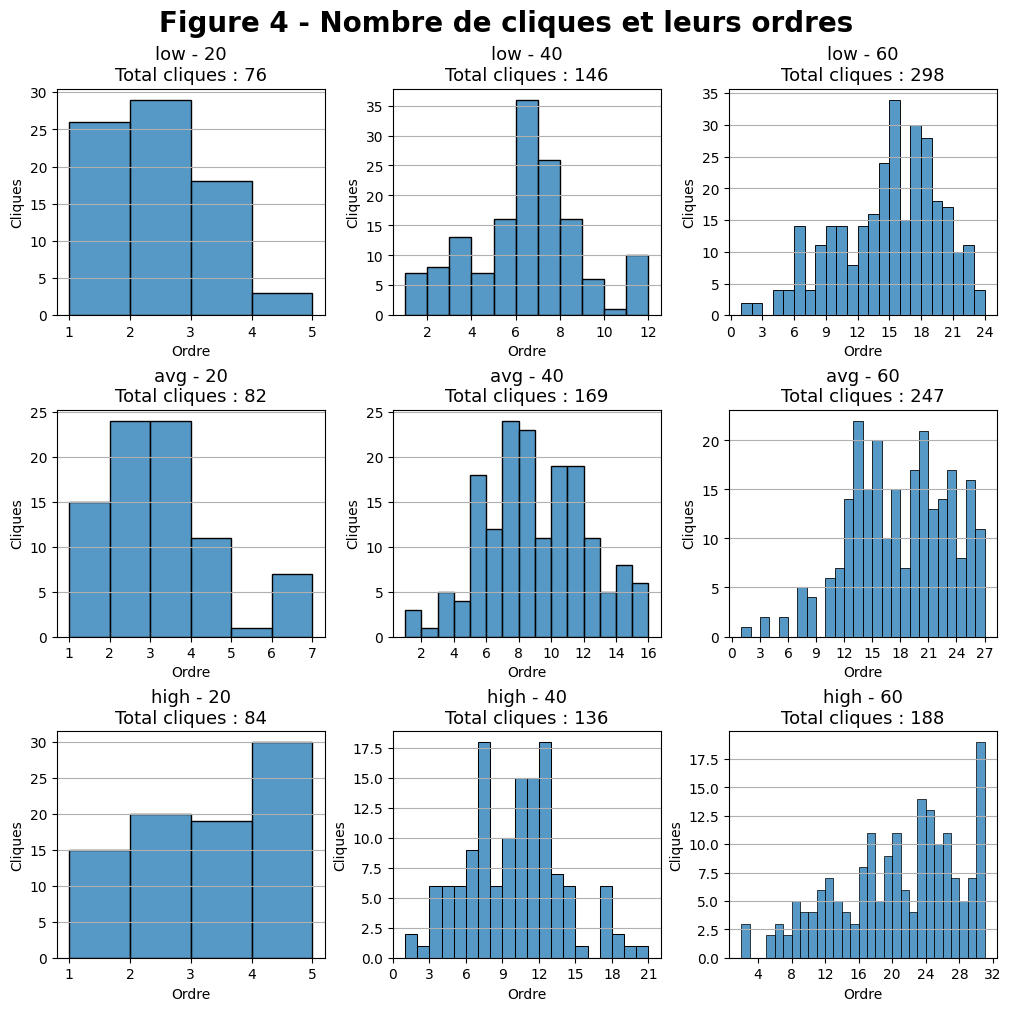

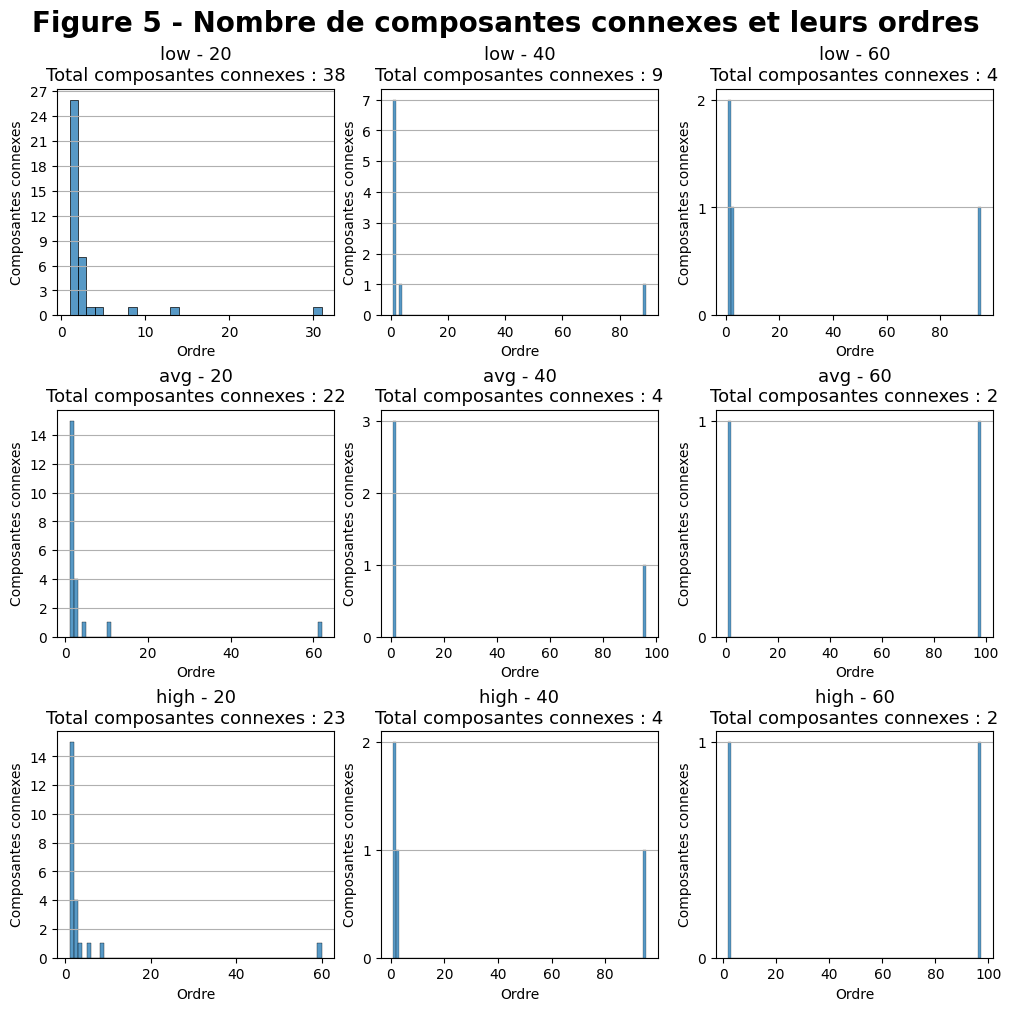

In [5]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# compute cliques number of vertices distribution and total number of cliques
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), layout="constrained")
fig.suptitle("Figure 4 - Nombre de cliques et leurs ordres", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    cliques = list(nx.find_cliques(G))
    nb_cliques = len(cliques)
    nb_vertices_by_clique = list(map(lambda x: len(x), cliques))
    ax = sns.histplot(nb_vertices_by_clique, stat='count', ax=axs[i,j], binwidth=1)
    ax.set_title(density + " - " + scope + "\nTotal cliques : " + str(nb_cliques), fontsize=13)
    ax.set(xlabel="Ordre", ylabel="Cliques")
    ax.grid(axis='y')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


# compute connected components number of vertices distribution and total number of connected components
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), layout="constrained")
fig.suptitle("Figure 5 - Nombre de composantes connexes et leurs ordres", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    conn_comp = list(nx.connected_components(G))
    nb_conn_comp = len(conn_comp)
    nb_vertices_by_comp_conn = list(map(lambda x: len(x), conn_comp))
    ax = sns.histplot(nb_vertices_by_comp_conn, stat='count', ax=axs[i,j], binwidth=1)
    ax.set_title(density + " - " + scope + "\nTotal composantes connexes : " + str(nb_conn_comp), fontsize=13)
    ax.set(xlabel="Ordre", ylabel="Composantes connexes")
    ax.grid(axis='y')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## Distribution des plus courts chemins et nombre des plus courts chemins

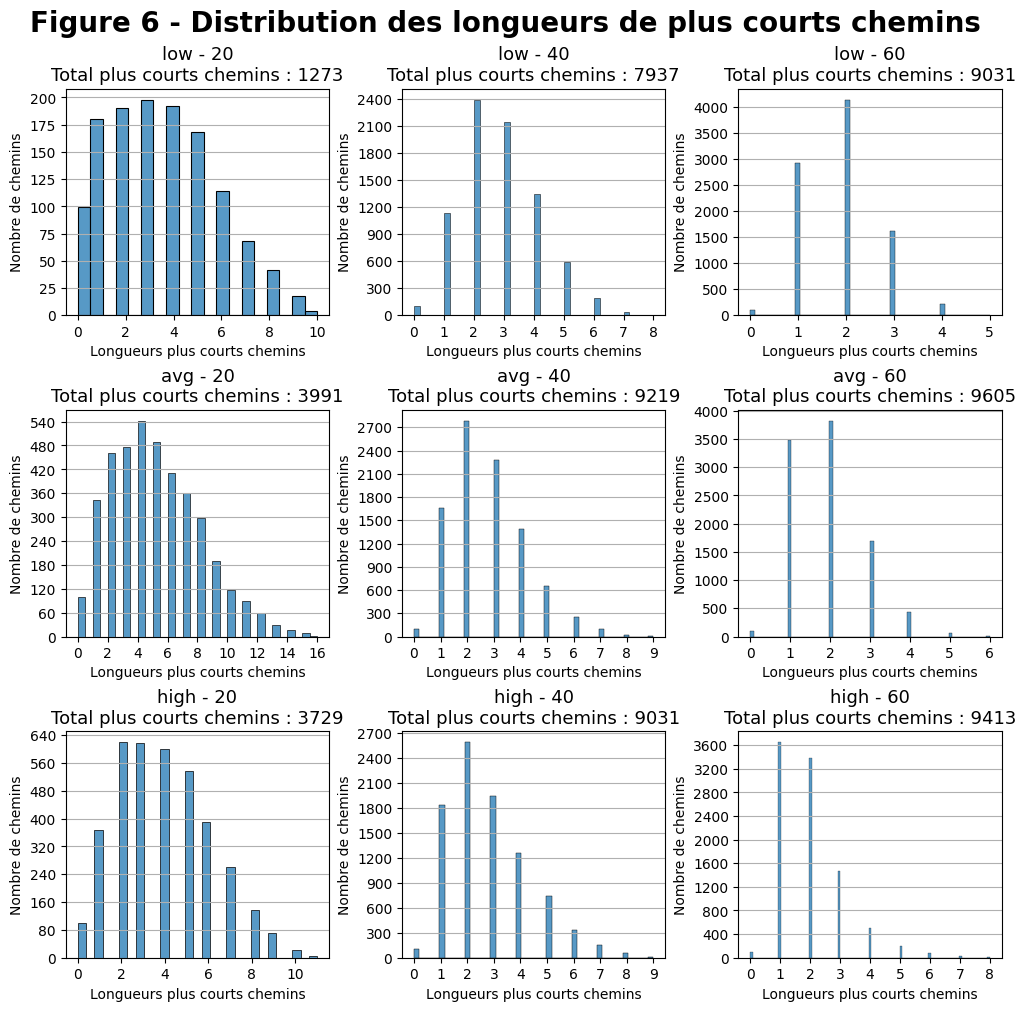

In [6]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# compute shortest path lengths distribution (path length is computed as number os jump from source to target nodes)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), layout="constrained")
fig.suptitle("Figure 6 - Distribution des longueurs de plus courts chemins (cas non valué)", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    length_shortest_path = []
    for source, dic in nx.shortest_path_length(G, weight=None):
        length_shortest_path += list(dic.values())
    list(filter(lambda x: x != 0, length_shortest_path))
    nb_shortest_path = len(length_shortest_path)
    ax = sns.histplot(length_shortest_path, stat='count', ax=axs[i,j])
    ax.set_title(density + " - " + scope + "\nTotal plus courts chemins : " + str(nb_shortest_path), fontsize=13)
    ax.set(xlabel="Longueurs plus courts chemins", ylabel="Nombre de chemins")
    ax.grid(axis='y')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Partie 3 : étude des graphes valués

Dans cette partie, nous prenons en compte le poids associé à chaque connection entre satellites qui sera égal au carré de la distance entre deux satellites. Ainsi, la seule figure qui change est celle des plus courts chemins qui peuvent dépendre de la distances entre chaque noeud. Nous donnons les résultats pour un portée de 60km seulement.

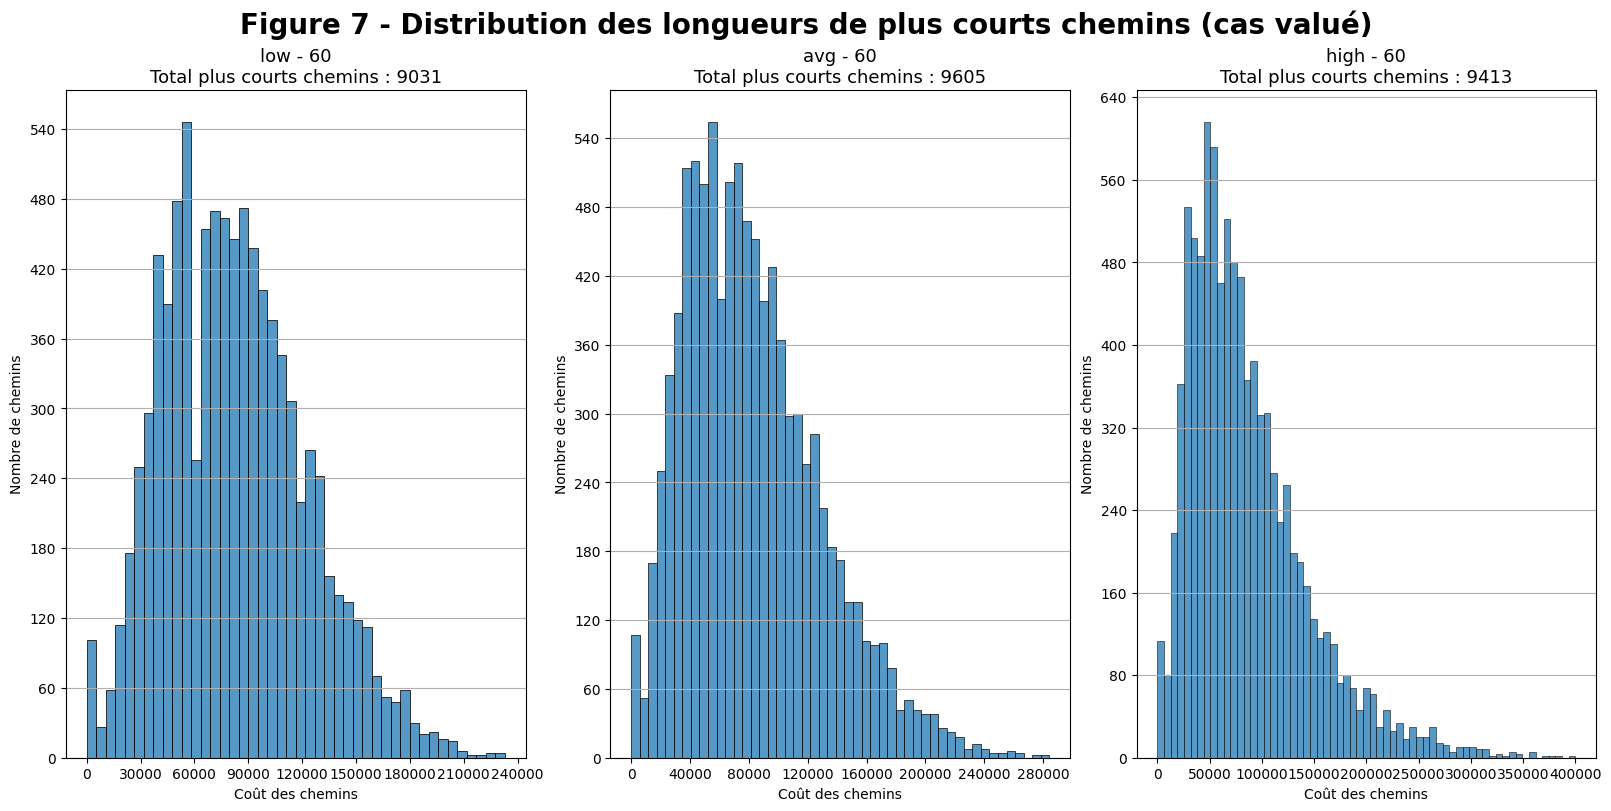

In [25]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# compute shortest path lengths distribution (path length is computed as the power 2 of the distance between two nodes)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 8), layout="constrained")
fig.suptitle("Figure 7 - Distribution des longueurs de plus courts chemins (cas valué)", fontsize=20, fontweight="bold")
for (density, scope), (G,i,j) in graphs_dict.items():
    if scope == "60":

        length_shortest_path = []
        for source, dic in nx.shortest_path_length(G, weight='weight'):
            length_shortest_path += list(dic.values())
        list(filter(lambda x: x != 0, length_shortest_path))
        nb_shortest_path = len(length_shortest_path)
        ax = sns.histplot(length_shortest_path, stat='count', ax=axs[i])
        ax.set_title(density + " - " + scope + "\nTotal plus courts chemins : " + str(nb_shortest_path), fontsize=13)
        ax.set(xlabel="Coût des chemins", ylabel="Nombre de chemins")
        ax.grid(axis='y')
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()